# Clustering App Usage Patterns for the University App
**Author:** Ihor Melashchenko
**Student ID:** C00290950
**Module:** Data Science and Machine Learning 1

This notebook applies unsupervised machine learning to group students based on their interactions with the University App.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [23]:
np.random.seed(42)
n = 400

data = pd.DataFrame({
    "logins_per_week": np.random.poisson(10, n),
    "digital_student_id_scans": np.random.poisson(5, n),
    "timetable_views": np.random.poisson(8, n),
    "events_attended": np.random.poisson(2, n),
    "notifications_opened": np.random.poisson(4, n),
    "average_session_duration": np.random.normal(12, 4, n).clip(2, 30)
})
data.head()

,logins_per_week,digital_student_id_scans,timetable_views,events_attended,notifications_opened,average_session_duration
0,12,4,7,1,5,6.827511
1,6,8,5,4,3,12.335490
2,11,3,9,3,4,7.678371
3,14,3,6,0,5,7.290334
4,7,5,6,2,5,10.305237


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
logins_per_week,400.0,9.797500,3.165683,1.0,7.750000,10.000000,12.000000,18.000000
digital_student_id_scans,400.0,5.000000,2.316985,0.0,3.000000,5.000000,7.000000,12.000000
timetable_views,400.0,7.905000,2.540099,1.0,6.000000,8.000000,9.250000,14.000000
events_attended,400.0,1.847500,1.268174,0.0,1.000000,2.000000,3.000000,6.000000
notifications_opened,400.0,3.967500,1.984007,0.0,3.000000,4.000000,5.000000,11.000000
average_session_duration,400.0,12.041776,4.121177,2.0,9.476265,12.061082,14.903157,25.509532


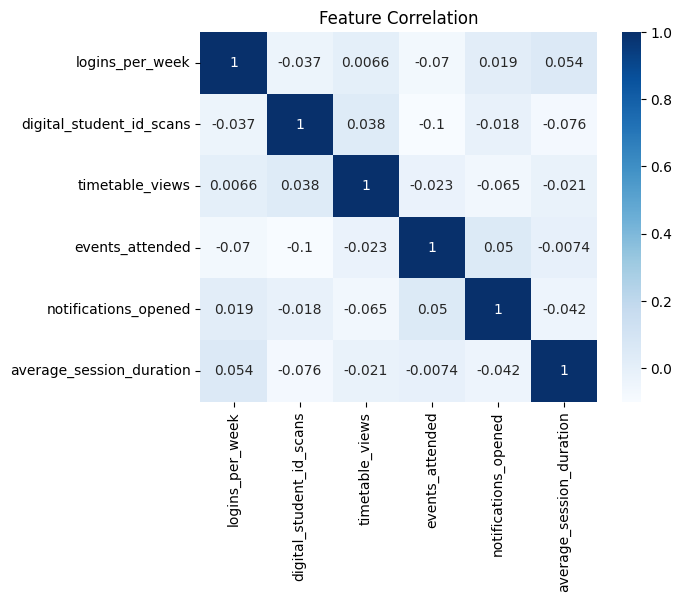

In [25]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation")
plt.show()

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

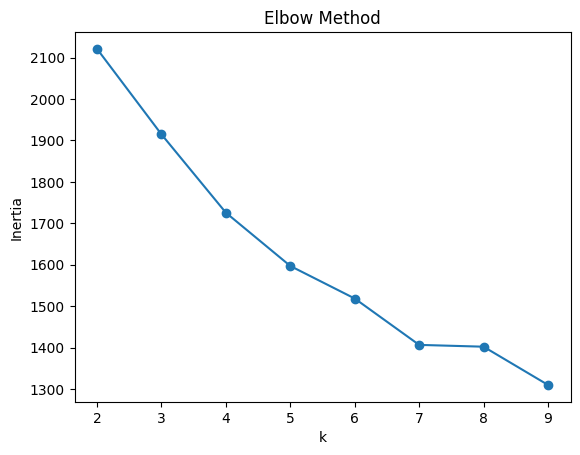

In [27]:
inertia = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters

In [29]:
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.111


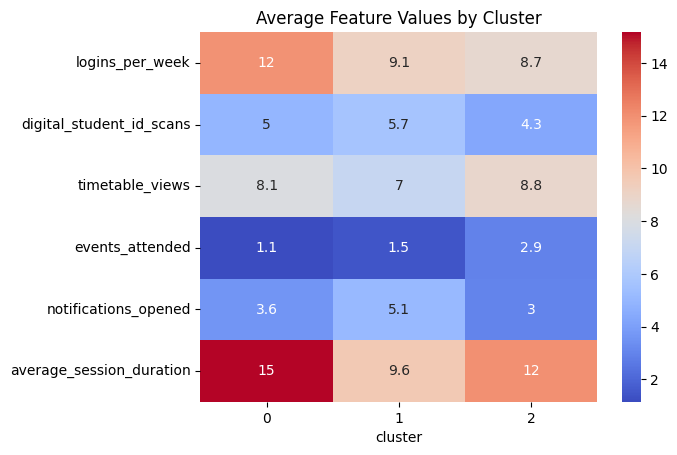

,logins_per_week,digital_student_id_scans,timetable_views,events_attended,notifications_opened,average_session_duration
cluster,,,,,,
0,11.92,4.97,8.05,1.15,3.58,15.17
1,9.10,5.65,7.03,1.46,5.14,9.64
2,8.69,4.29,8.77,2.91,2.98,11.97


In [30]:
cluster_summary = data.groupby("cluster").mean().round(2)
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True)
plt.title("Average Feature Values by Cluster")
plt.show()

cluster_summary

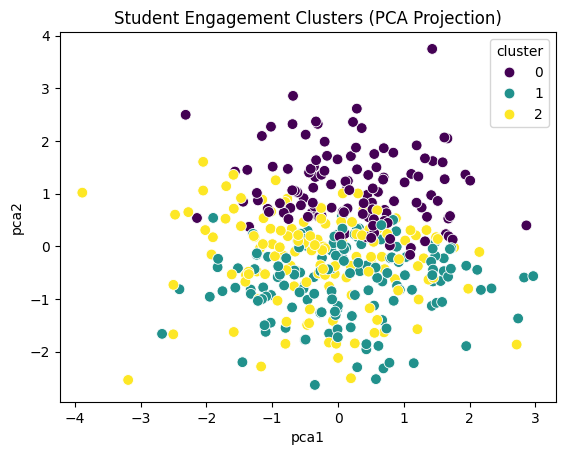

In [31]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
data["pca1"], data["pca2"] = reduced[:, 0], reduced[:, 1]

sns.scatterplot(data=data, x="pca1", y="pca2", hue="cluster", palette="viridis", s=60)
plt.title("Student Engagement Clusters (PCA Projection)")
plt.show()

### Cluster Interpretation
| Cluster | Behavior Pattern | Notes|
|---------|------------------|------|
| 0 | High enagement | Frequent logins, events, long sessions |
| 1 | Moderate engagement | Regular users, balanced activity |
| 2 | Low engagement | Minimal use of app features |

These clusters can guide targeted communication and feature design within the University app.

In [32]:
data.to_csv("../data/university_app_usage_clusters.csv", index=False)

## Conclusion
Unsupervised learning using K-Means revealed distinct patterns of student behavior in the University App.
These insights will inform the next phase: **Predicting Student Retention Risk**, where we apply supervised learning to forecast disengagement using labeled data.